In [2]:
import warnings

warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import pandas as pd
import matplotlib.pyplot as plt
import itertools as it

In [4]:
# load and preview data
xl = pd.ExcelFile('input_data.xlsx')

data = {sheet_name: xl.parse(sheet_name) for sheet_name in xl.sheet_names}

print('Extract from W1 sheet:\n')
print(data['W1'].head())

Extract from W1 sheet:

   HOURS  MON  TUE  WED  THU  FRI  SAT  SUN
0      0   65   64   91   82  140  112  146
1      1   47   43   49   59   56   63   60
2      2   23   48   32   27   39   77   39
3      3   17   32   13   41   31   45   36
4      4    9    7   22    4   14   45   24


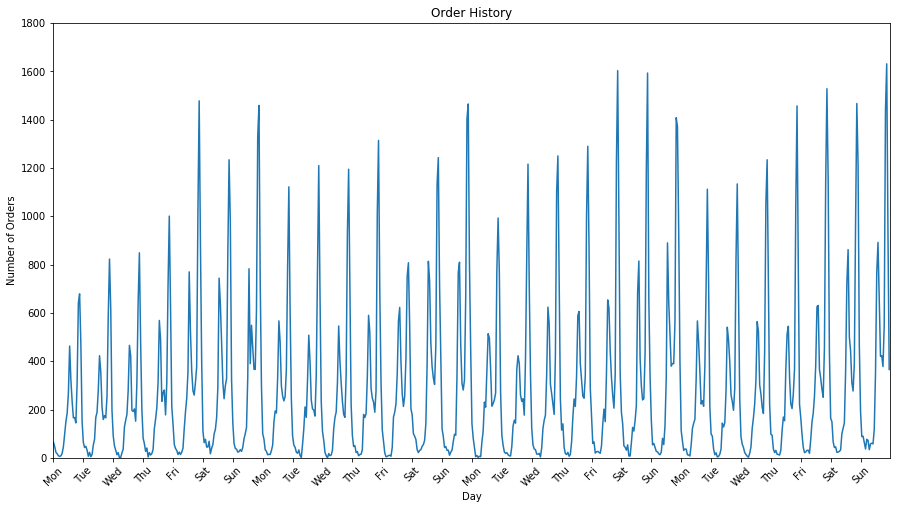

In [5]:
# plot full time series
res = []

for name in xl.sheet_names:
    mylist = map(list, zip(*data[name].values))
    aux = list(it.chain(*mylist))
    del aux[:24]
    res.append(aux)

res = list(it.chain(*res))

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#days_repeated = [days for i in range(0, 4)]
days_repeated = days * 4
#days_repeated = list(it.chain(*days))

plt.rcParams['figure.figsize'] = [15, 8]

plt.plot(res)
plt.axis([0, 672, 0, 1800])
plt.xticks(range(0,672,24), days_repeated, rotation=45)
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.title('Order History')
plt.show()

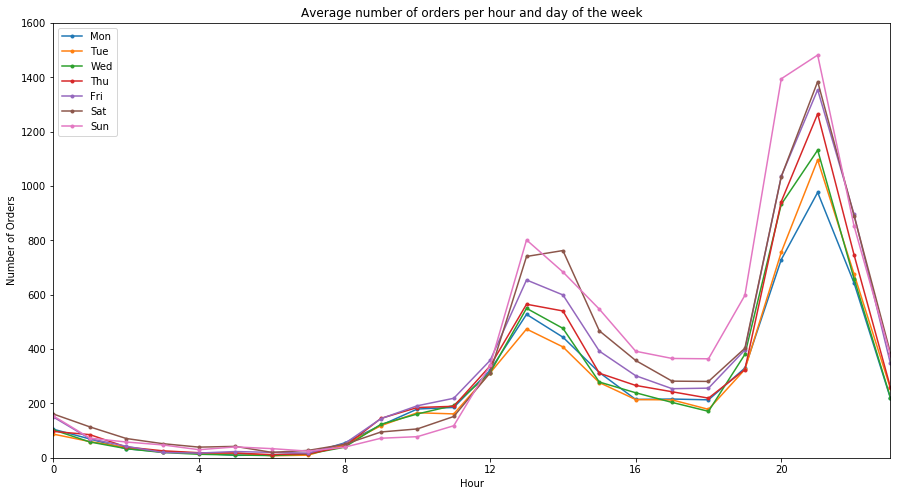

In [6]:
# average orders by hour and day
plt.rcParams['figure.figsize'] = [15, 8]

temp = data['W1'].add(data['W2']).add(data['W3']).add(data['W4'])/4

temp = temp.drop('HOURS', 1)
plt.plot(temp, linestyle='-', marker='.')
plt.axis([0, 23, 0, 1600])
plt.xticks(range(0, 24, 4))
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Average number of orders per hour and day of the week')
plt.legend(days, loc="upper left", fancybox=True)
plt.show()

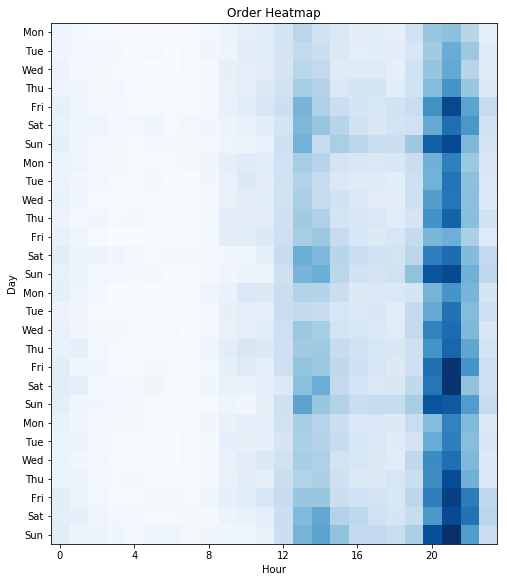

In [7]:
# construct and plot heatmap
plt.rcParams['figure.figsize'] = [8, 15]

orders = [res[i:i + 24] for i in range(0, len(res), 24)]

cols = range(0,24)
rows = range(0,28)
df = pd.DataFrame(orders,
                  columns=cols,
                  index=rows)

ax = plt.imshow(df, interpolation='nearest', cmap='Blues').axes
ax.set_xticks(range(0,24,4))
ax.set_yticks(rows)
ax.set_yticklabels(days_repeated)
plt.xlabel('Hour')
plt.ylabel('Day')
plt.title('Order Heatmap')
ax.grid(False)
plt.show()